In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
# Load the Data
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **Exploratory Data Analysis**

In [3]:
# check for the missing data and data type

print(df.isnull().sum())
print(df.info())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11  

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


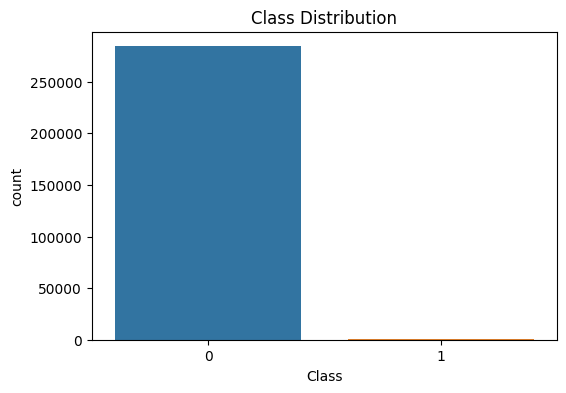

In [5]:
# class distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4)) #sets a figure size
sns.countplot(x='Class', data=df) #Seaborn function used to create a count plot. 
plt.title('Class Distribution')
plt.show()

In [6]:
print(df['Class'].value_counts())
df.shape

Class
0    284315
1       492
Name: count, dtype: int64


(284807, 31)

In [7]:
# percentage of the fraud detected
fraud_percentage = df['Class'].value_counts(normalize=True)*100
print(f"Fraudalent transactions:{fraud_percentage[1]:.4f}%")

Fraudalent transactions:0.1727%


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


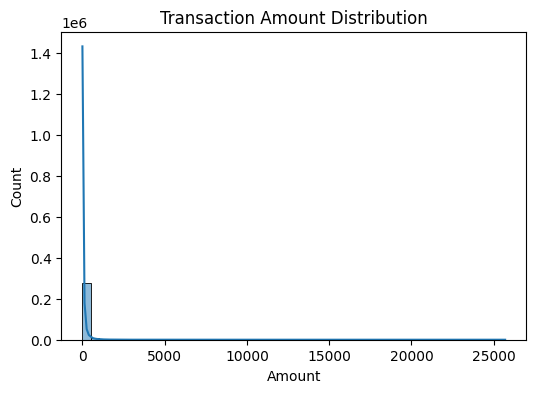

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


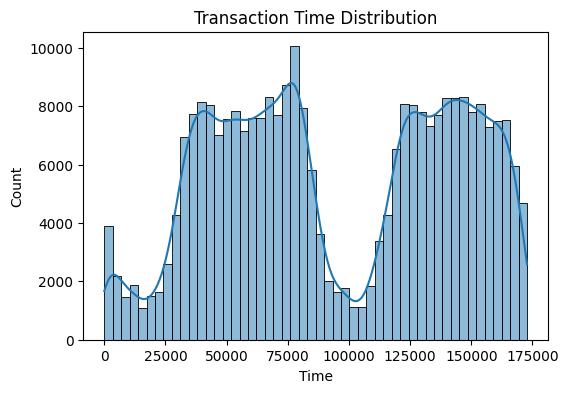

In [8]:


# Plot distribution of 'Amount'
plt.figure(figsize=(6, 4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Plot distribution of 'Time'
plt.figure(figsize=(6, 4))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.show()


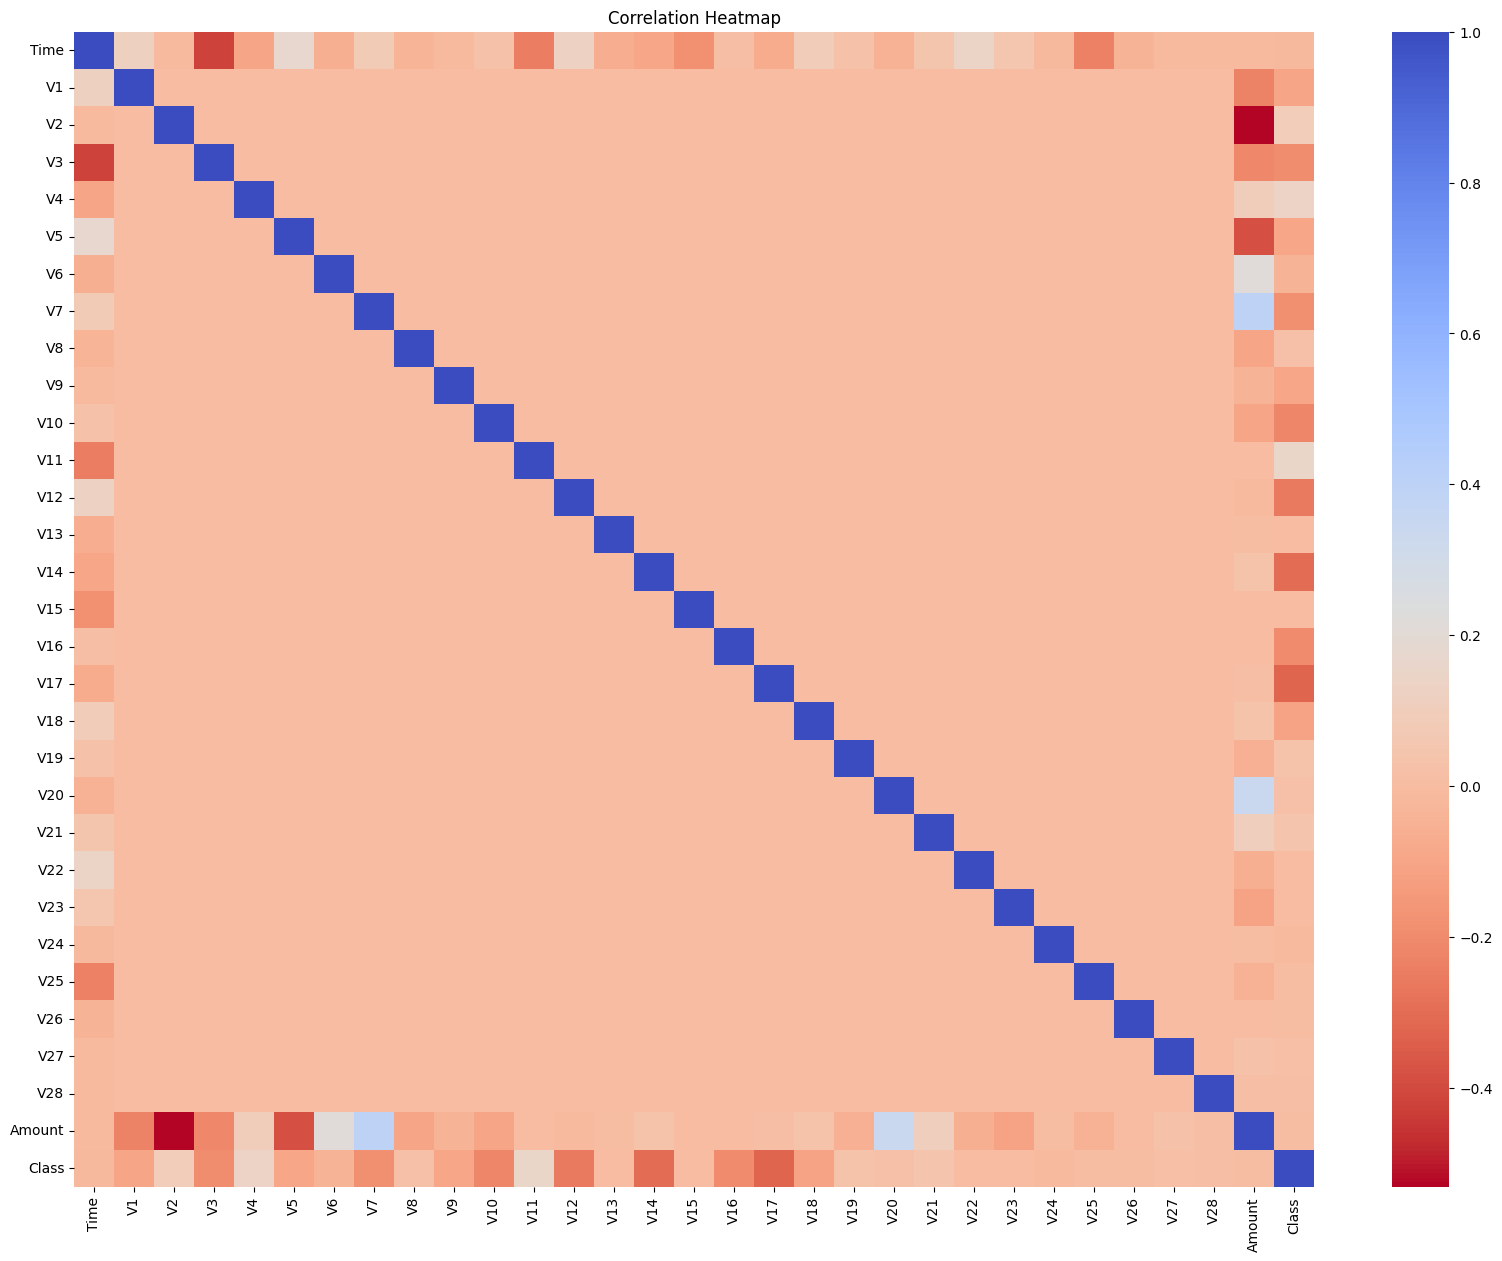

In [9]:
# Correlation heatmap of all features
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot=False)
plt.title('Correlation Heatmap')
plt.show()


# **Data Preprocessing**

**sm = SMOTE(random_state=42)**

*SMOTE* is a technique used to address class imbalance in datasets, where one class has significantly fewer samples than the other.

**random_state=42** sets random seed to SMOTE Algorithm.

**sm.fit_resample**: This method from the SMOTE object is used to apply the SMOTE algorithm to the training data.

The resulting X_train_res and y_train_res contain the original and synthetic samples, respectively.

This balanced training data can then be used to train a machine learning model that is less biased towards the majority class and more capable of handling imbalanced datasets.


In [10]:
# handling class inbalance with SMOTE

# separate features and target variable 
X = df.drop('Class', axis=1)
y = df['Class']

#import library
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# split the data into training and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Display the shape of the resampled dataset
print(f"Resampled training set shape: {X_train_res.shape}")
print(f"Resampled class distribution:\n{y_train_res.value_counts()}")

Resampled training set shape: (398016, 30)
Resampled class distribution:
Class
0    199008
1    199008
Name: count, dtype: int64


# **Feature scaling**

**Standardization** is a common preprocessing step in machine learning to ensure that features have a mean of 0 and a standard deviation of 1. This helps prevent features with larger magnitudes from dominating the learning process.

The StandardScaler class from scikit-learn provides a convenient way to perform standardization.

The **fit_transform method** is used on the training data to learn the standardization parameters and apply them to the data.

The **transform method** is used on the testing data to apply the learned parameters without refitting the scaler

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize the 'Amount' and 'Time' features
scaler = StandardScaler()
X_train_res[['Time', 'Amount']] = scaler.fit_transform(X_train_res[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])


#  **Model training**

**Random Forest Classifier**:

A powerful ensemble learning algorithm that combines multiple decision trees to make predictions.

Each decision tree in the forest is trained on a random subset of the data and features, promoting diversity and reducing overfitting.

The final prediction is made by aggregating the predictions from all trees, often through majority voting or averaging.

**Hyperparameter Tuning**:

*n_estimators*: Number of trees in the forest.

*max_depth*: Maximum depth of each tree.

*max_features*: Number of features considered at each split.

*min_samples_split*: Minimum number of samples required to split an internal node.

*min_samples_leaf*: Minimum number of samples required to be at a leaf node.   

Hyperparameter tuning can significantly improve the performance of a Random Forest Classifier.

In [12]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the resampled training data
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)


# **Model Evaluation**

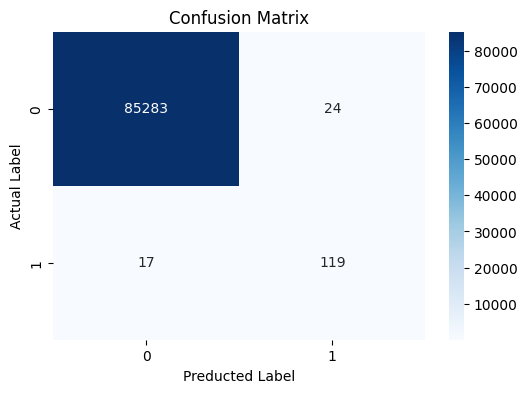

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.88      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Confusion Matrix

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Preducted Label')
plt.show()

# Classification Report
print(classification_report(y_test,y_pred))

ROC-AUC Score: 0.9768


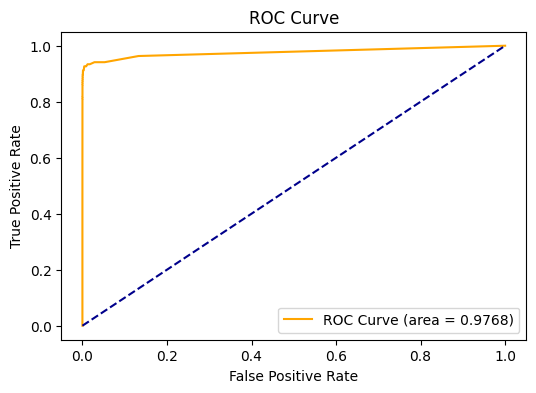

In [14]:
# Calculate ROC-AUC score
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Interpretation**
**Analysis of Confusion Matrix vs. Classification Report**:

*Performance for Class 0 (Legitimate Transactions)*:

The confusion matrix shows that the model classified 85,283 legitimate transactions correctly and made only 24 mistakes, meaning that 24 legitimate transactions were incorrectly flagged as fraud (false positives).

In the classification report, this translates to precision, recall, and F1-scores of 1.00, indicating that the model is nearly perfect at detecting legitimate transactions.

This is expected since Class 0 (legitimate transactions) dominates the dataset.

*Performance for Class 1 (Fraudulent Transactions)*:

The confusion matrix shows that the model identified 119 fraudulent transactions correctly, but it missed 17 fraudulent transactions (false negatives).
The classification report shows a precision of 0.83 and a recall of 0.88 for Class 1 (fraud), which reflects the fact that:

Precision: Out of the transactions labeled as fraudulent, 83% were indeed frauds (the other 17% were false positives).

Recall: The model caught 88% of all fraudulent transactions, but 12% (17 frauds) were missed.

**Macro and Weighted Averages**:

Macro avg: This is the average of precision, recall, and F1-score across both classes, giving equal weight to both legitimate and fraudulent transactions. It helps summarize how well the model is performing across the two classes without biasing towards the larger class (Class 0).

Macro avg precision = 0.92

Macro avg recall = 0.94

Macro avg F1-score = 0.93

Weighted avg: This takes into account the number of instances in each class, which is why it's close to 1.00, because Class 0 (legitimate transactions) dominates the dataset. This is a bit misleading, so it's better to focus on the macro average or performance of Class 1 (fraudulent transactions) for more balanced insight.

**ROC-AUC Score**:

The ROC-AUC score of 0.9768 is quite high, indicating that the model is doing a great job distinguishing between legitimate and fraudulent transactions. This score reflects the model's performance across all thresholds, combining both precision and recall.

It provides a good balance and suggests that, in general, the model is very capable of separating the two classes.



# **Further Strategy**

1. **Focus on Fraud Detection (Class 1 Performance)**:
   
False Negatives (Missed Frauds):

The model missed 17 frauds (false negatives), which is a key area for improvement. While 88% recall is good, minimizing missed frauds is crucial.

A high false negative rate in fraud detection could lead to financial losses. We can increase recall even at the expense of some precision (meaning accepting more false positives).

**Precision vs. Recall Tradeoff**:

Right now, precision = 0.83 and recall = 0.88. Depending on the business context (the cost of a missed fraud vs. the cost of falsely flagging legitimate transactions), we can adjust the classification threshold to increase recall (catch more frauds), even if that reduces precision a bit (results in more false positives).

2. **Threshold Tuning**:
By default, most classification models use a threshold of 0.5 to classify a transaction as fraudulent (Class 1).  Adjust this threshold to increase sensitivity to fraud (maximize recall).

For example, if the threshold is lowered to 0.4 or 0.3, the model would flag more transactions as fraud, thus catching more fraudulent cases at the cost of more false positives.
